### make data

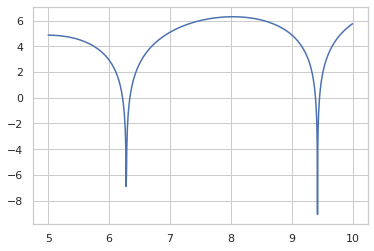

In [104]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
from torch.autograd import Variable

%matplotlib inline
x = np.linspace(5, 10, 1000)
y = np.log(np.sin(x) * np.cos(x) * (-2*x + x**2 + x**3 + 3) * np.tan(x))
plt.plot(x, y)

### split data

In [48]:
np.floor(validation_split * dataset_size)

200.0

In [49]:
#https://stackoverflow.com/questions/50544730/how-do-i-split-a-custom-dataset-into-training-and-test-datasets
shuffle_dataset = 1
validation_split = .2

dataset_size = len(x)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset:
    np.random.seed(99)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

In [56]:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)
train_loader = torch.utils.data.DataLoader(x, batch_size=100, sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(x, batch_size=100, sampler=valid_sampler)

### model

In [37]:
class simpleNet(nn.Module):
    def __init__(self):
        super(simpleNet, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(in_features=1, out_features=2**15),
            nn.ReLU(),
            nn.Linear(in_features=2**15, out_features=1)
        )
    
    def forward(self, x):
        x = self.fc(x)
        return x        

In [128]:
label

array([ 2.53846041,  4.38060924,  4.87561556,  4.67039776,  4.90954744,
        2.6940129 ,  6.10115964,  4.7127924 , -1.03808648,  5.2500478 ,
        6.31208816,  5.35139051,  4.05478756,  6.30039264,  6.30979623,
        5.35679765, -2.46367461,  5.70093285,  5.85275698,  5.49750039,
        4.87157351,  4.48637987,  1.90301418,  5.31034681,  4.53396728,
        4.29018529, -0.58314115,  5.12367287,  6.30239827,  3.86912618,
        4.85065597,  0.82164042,  4.40300893,  4.11004863, -3.03510247,
        1.0108104 ,  6.30154324,  4.6409563 ,  6.30367821,  3.60075472,
        4.74831423,  0.37192101,  2.4546153 ,  6.30779637, -0.54222115,
        2.00460143,  5.95192473,  4.17600071,  3.63576799,  5.88294932,
        6.27429873,  4.95183278,  5.76995579,  4.32075939,  5.04576617,
        5.77727677,  6.17591946,  6.31310961,  3.41615914,  5.7929108 ,
        5.73579512,  5.14810143,  5.38547451,  0.92132056,  6.28579921,
        6.26999815,  5.28230378,  3.26826914,  5.43444806,  4.08

In [129]:
net = simpleNet()
loss, optimizer = F.mse_loss, optim.Adam(net.parameters(), lr = 1e-7)
running_loss = .0
for epoch in range(100):
    for batch_idx, data in enumerate(train_loader):
        label = y[train_indices[batch_idx*100 : (batch_idx+1)*100]]
        data = Variable(data, requires_grad=True)
        label = Variable(label, requires_grad=True)
        
        output = net(data)
        optimizer.zero_grad()
        
        running_loss = loss(output.view(-1), label, True)
        running_loss.backward()
        optimizer.step()
        print(running_loss)


In [117]:
output = Variable(torch.Tensor(
[-0.0226, -0.1922, 0.1461, -0.0481, -0.0526, -0.0449, 0.1586, -0.0980, 0.2177, 
0.0402, -0.1200, 0.0010, 0.0022, 0.0430, 0.1930, 0.2304, 0.0043, 0.0659, 0.2427, 
0.1580, -0.0449, -0.0477, 0.1961, 0.2336, -0.0308, 0.0648, 0.0669, 0.0072, 0.0353,
-0.2793, 0.0105, -0.1510, -0.0942, -0.1761, 0.0477, -0.0564, -0.1628, 0.0467, 
-0.0819, -0.2643, 0.1066, -0.0952, 0.0918, -0.0934, 0.1405, -0.1959, -0.0477,
-0.1138, -0.1032, -0.0622, -0.0658, 0.2957, -0.1170, -0.1541, 0.1663, 0.2635,
-0.1477, 0.2634, 0.0940, -0.0477, -0.1920, 0.0104, 0.3450, -0.0514, -0.1592, 0.2188,
-0.3998, -0.1696, -0.1194, -0.3216, -0.0702, 0.0074, -0.0223, 0.0597, 0.0329, 
-0.1500, 0.2207, 0.1900, -0.0688, 0.3510, 0.1114, -0.0829, 0.0919, -0.1787, 0.0266, 
-0.2059, 0.0821, -0.1061, 0.1190, 0.0090]), requires_grad=True)

target = Variable(torch.Tensor(
[0.3100, 0.0638, -0.1865, -0.4252, -0.6371, -0.8090, -0.9300, -0.9922, -0.9919, 
-0.9289, -0.8072, -0.6343, -0.4212, -0.1814, 0.0700, 0.3170, 0.5440, 0.7365, 0.8823,
0.9720, 0.9999, 0.9641, 0.8669, 0.7143, 0.5162, 0.2850, 0.0355, -0.2163, -0.4543, 
-0.6634, -0.8300, -0.9435, -0.9965, -0.9855, -0.9113, -0.7784, -0.5955, -0.3742,
-0.1287, 0.1252, 0.3711, 0.5931, 0.7769, 0.9105, 0.9854, 0.9965, 0.9431, 0.8286, 
0.6604, 0.4493, 0.2089, -0.0451, -0.2962, -0.5282, -0.7259, -0.8763, -0.9697, 
-1.0000, -0.9649, -0.8669, -0.7122, -0.5110, -0.2762, -0.0232, 0.2313, 0.4707, 
0.6794, 0.8435, 0.9523, 0.9986, 0.9792, 0.8954, 0.7526, 0.5602, 0.3308, 0.0794,
-0.1772, -0.4222, -0.6394, -0.8143, -0.9355, -0.9947, -0.9880, -0.9158, -0.7828,
-0.5979, -0.3731, -0.1234, 0.1345, 0.3836]))


In [120]:
train_loss1 = F.mse_loss(output, target, True)
train_loss2 = ((output - target)**2).mean()
train_loss1

/home/henry/anaconda3/envs/torch_conda/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


tensor(0.5171, grad_fn=<MseLossBackward>)